# Assignment 6
## Roll Number `31311`
### Data Visualization III
- **Download the Iris flower dataset or any other dataset into a DataFrame. <br> (e.g., https://archive.ics.uci.edu/ml/datasets/Iris).**
- **Scan the dataset and give the inference as:**
    - **List down the features and their types (e.g., numeric, nominal) available in the dataset.**
    - **Create a histogram for each feature in the dataset to illustrate the feature distributions.**
    - **Create a box plot for each feature in the dataset.**
**Compare distributions and identify outliers**


In [1]:
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
os.listdir("./iris-dataset/")

['iris.names', 'Index', 'iris.csv', 'bezdekIris.data']

In [3]:
df = pd.read_csv("./iris-dataset/iris.csv")
df.head()

,SepalLengthInCm,SepalWidthInCm,PetalLengthInCm,PetalWidthInCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning
#### The `Iris` dataset is know to be very uniform and consistent. <br>However, in the endeavour of being through we will check for any missing values or outliers 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLengthInCm  150 non-null    float64
 1   SepalWidthInCm   150 non-null    float64
 2   PetalLengthInCm  150 non-null    float64
 3   PetalWidthInCm   150 non-null    float64
 4   Class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthInCm,SepalWidthInCm,PetalLengthInCm,PetalWidthInCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

SepalLengthInCm    0
SepalWidthInCm     0
PetalLengthInCm    0
PetalWidthInCm     0
Class              0
dtype: int64

### 1. List down the features and their types (e.g., numeric, nominal) available in the dataset.

In [8]:
df.dtypes

SepalLengthInCm    float64
SepalWidthInCm     float64
PetalLengthInCm    float64
PetalWidthInCm     float64
Class               object
dtype: object

- **Here the column `class` is an object as it represent the species of flower.** 
- **There are a total of 3 species in this dataset, we can one hot encode these categorical values as and when required.**

### 2. Create a histogram for each feature in the dataset to illustrate the feature distributions.

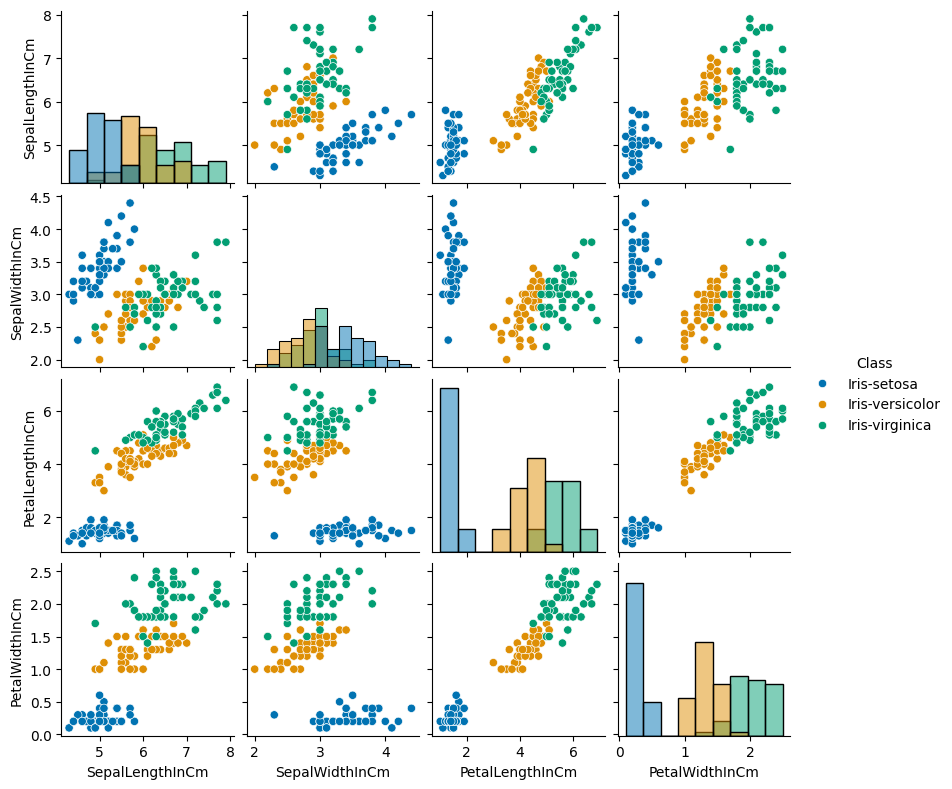

In [99]:
sns.pairplot(df, hue="Class", diag_kind='hist', height=2, palette="colorblind")
plt.show()

### 3. Create a box plot for each feature in the dataset.

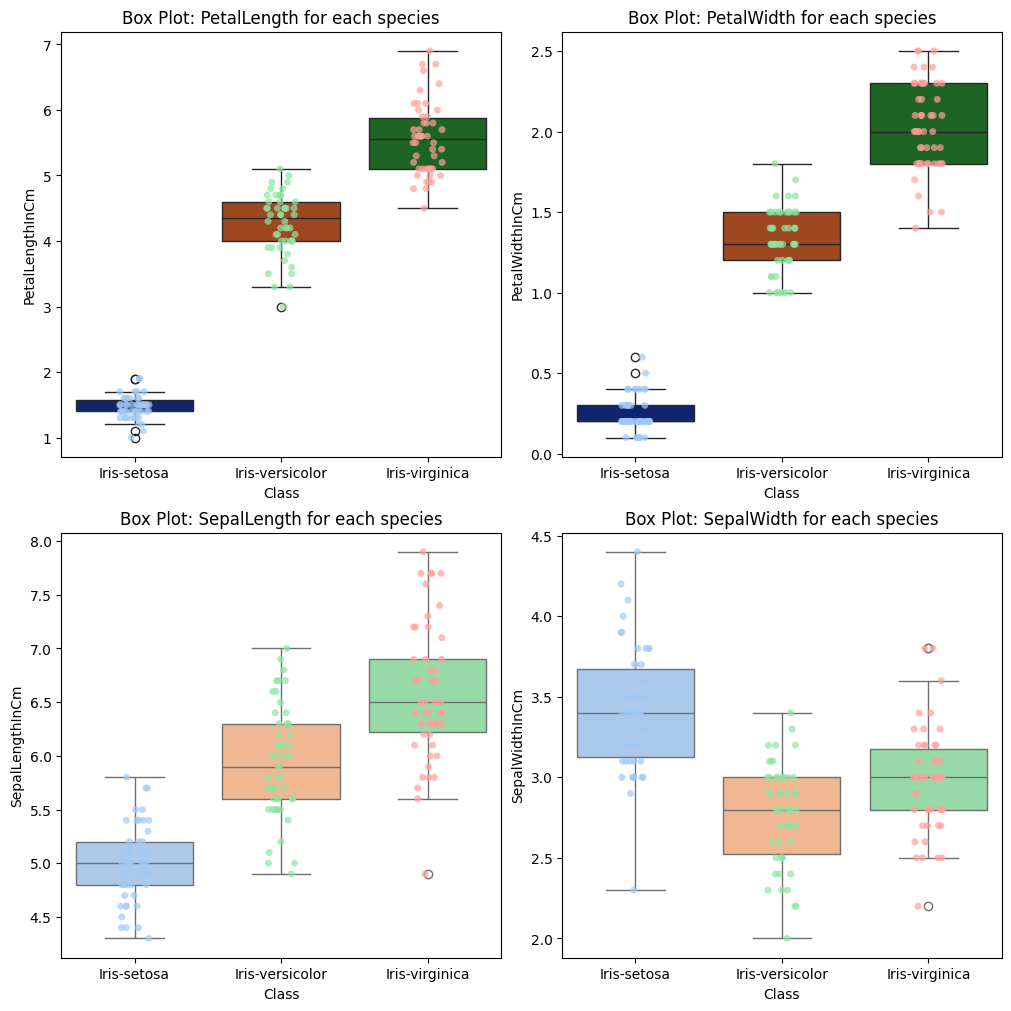

In [60]:
# We can look at an individual feature in Seaborn through a boxplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True, )
sns.boxplot(x="Class", y="PetalLengthInCm", data=df, ax=axs[0,0], hue="Class", palette="dark")
sns.stripplot(x="Class", y="PetalLengthInCm", data=df, ax=axs[0,0], hue="Class", palette="pastel6", edgecolor="black", alpha=0.7)
axs[0,0].set_title('Box Plot: PetalLength for each species')

sns.boxplot(x="Class", y="PetalWidthInCm", data=df, ax=axs[0,1], hue="Class", palette="dark")
sns.stripplot(x="Class", y="PetalWidthInCm", data=df, ax=axs[0,1], hue="Class", palette="pastel6", edgecolor="black", alpha=0.7)
axs[0,1].set_title('Box Plot: PetalWidth for each species')

sns.boxplot(x="Class", y="SepalLengthInCm", data=df, ax=axs[1,0], hue="Class", palette="pastel")
sns.stripplot(x="Class", y="SepalLengthInCm", data=df, ax=axs[1,0], hue="Class", palette="pastel6", edgecolor="black", alpha=0.7)
axs[1,0].set_title('Box Plot: SepalLength for each species')

sns.boxplot(x="Class", y="SepalWidthInCm", data=df, ax=axs[1,1], hue="Class", palette="pastel")
sns.stripplot(x="Class", y="SepalWidthInCm", data=df, ax=axs[1,1], hue="Class", palette="pastel6", edgecolor="black", alpha=0.7)
axs[1,1].set_title('Box Plot: SepalWidth for each species')

plt.show()

The `pairplot`, shows the bivariate relation between each pair of features.
This is something we briefly viewed using `sns.jointplot()`
<br><br> 
From the pairplot, we'll see that the Iris-setosa species is separataed from the other
two across all feature combinations

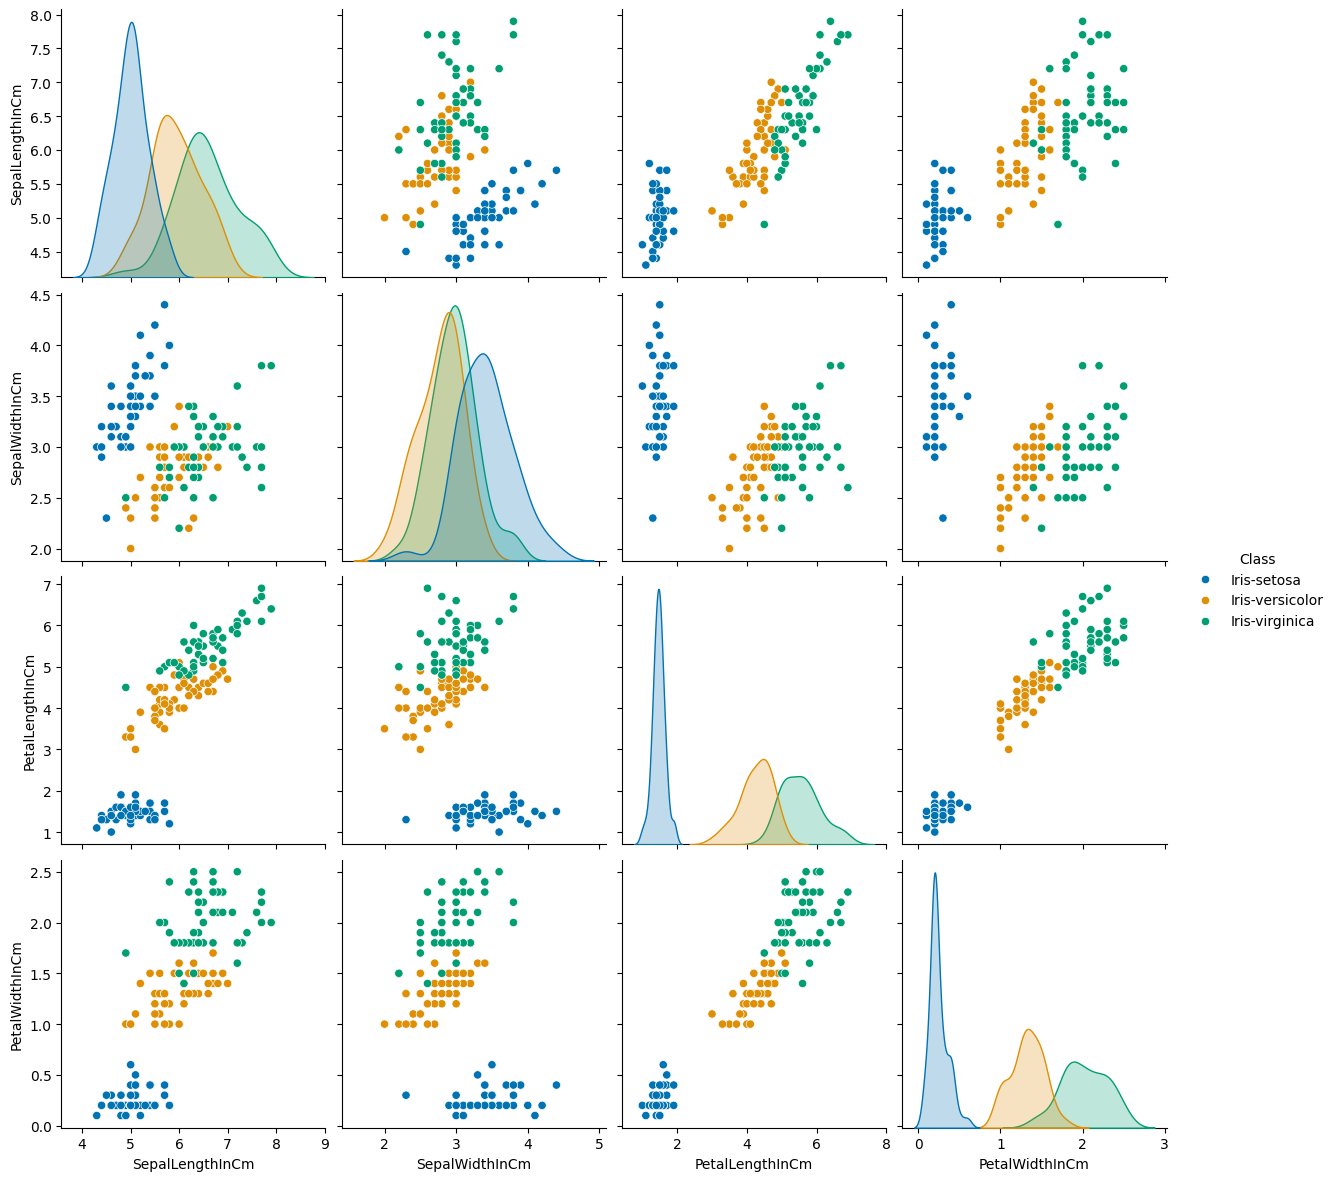

In [82]:
sns.pairplot(df, hue="Class", kind='scatter', height=3, palette="colorblind")
plt.show()

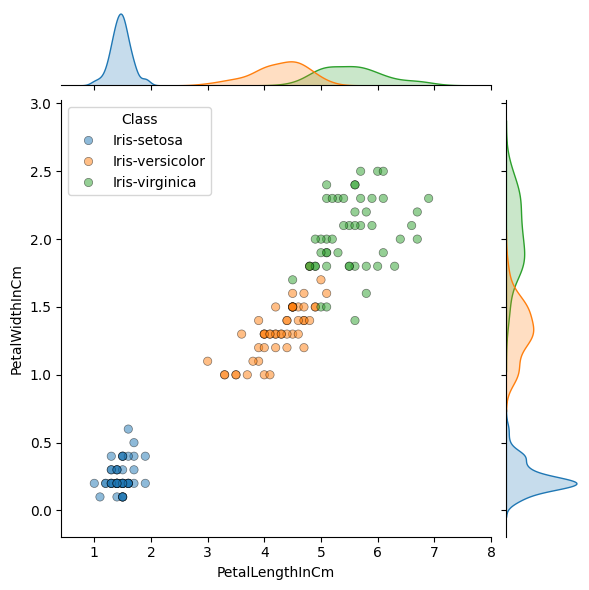

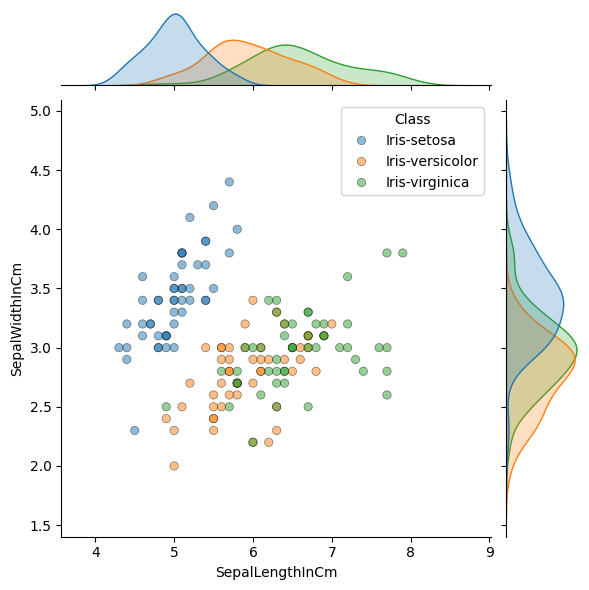

In [106]:
sns.jointplot(data=df, x='PetalLengthInCm', y='PetalWidthInCm', hue="Class", alpha=0.5, joint_kws={'edgecolor':'black'})

sns.jointplot(data=df, x="SepalLengthInCm", y="SepalWidthInCm", hue="Class", alpha=0.5, joint_kws={'edgecolor':'black'})
plt.show()

- Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data. 
- It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothed version of a parallel coordinate plot. 
- It is named after the statistician David F. Andrews.

- Andrews, D. F. (1972). ["Plots of High-Dimensional Data"](https://www.jstor.org/stable/2528964). Biometrics. 28 (1): 125–136. doi:10.2307/2528964. JSTOR 2528964
- Paper : García-Osorio, César; Fyfe, Colin (2005). ["Visualization of High-Dimensional Data via Orthogonal Curves"](https://www.jucs.org/jucs_11_11/visualization_of_high_dimensional/jucs_11_11_1806_1819_garc_a_osorio.pdf) (PDF). Journal of Universal Computer Science. 11 (11): 1806–1819.

### Andrew's Curves
1. Cluster Separation
    - The Iris-setosa curves are clearly separate from the other two species.
    - Iris-versicolor and Iris-virginica curves overlap significantly, indicating that these two species share more similar feature distributions.

2. Pattern Consistency
    - The curves of each species follow a similar shape, meaning that within each species, the data points are relatively consistent.
    - Iris-virginica does show a wider spread at the peak, suggesting more variation in its data.
3. Outliers
    - Most curves follow a structured pattern within each species; the dataset does not appear to have any extreme outliers.

<Axes: >

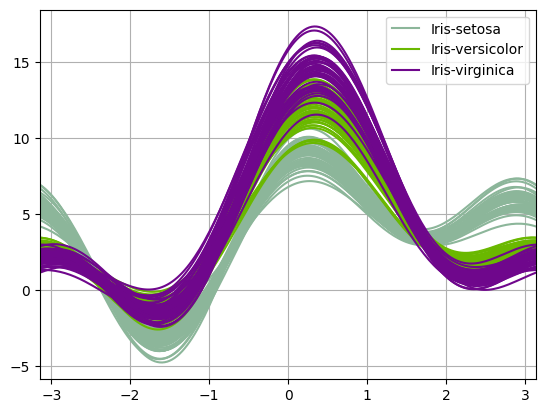

In [108]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df, "Class")